### **<span style="background-color: yellow; color: black">2. Trabajo de código: Reacción-Difusión</span>**

Estudiaremos un modelo representado por ecuaciones de reacción-difusión. Consideramos en particular el modelo de **Gray-Scott**, el cual simula la interacción de dos especies químicas que reaccionan y difunden.

#### **<span style="background-color: yellow; color: black">2.1. Modelo de Gray-Scott</span>**
Sean las especies U y V cuya concentración en un punto espacial se representa por las variables u y v. El modelo sigue reglas simples:

  * cada especie química difunde a través del espacio a su propia velocidad;
  * la especie U se alimenta al sistema a velocidad constante;
  * dos unidades de especies V pueden transformar una unidad de especie U en V: $2V + U \rightarrow 3V$
  * la especie V se remueve del sistema a velocidad constante.

Este modelo se describe por el siguiente sistema de PDEs para las concentraciones u(x, y, t) y v(x, y, t):

$$\frac{\partial u}{\partial t}=D_{u}\nabla^{2}u-uv^{2}+F(1-u) \quad (1)$$

$$\frac{\partial v}{\partial t}=D_{v}\nabla^{2}v+uv^{2}-(F+k)v \quad (2)$$

El primer término del lado derecho de cada ecuación corresponde a la difusión espacial de cada concentración, siendo $D\_u$ y $D\_v$ las velocidades de difusión respectivas. Recordar el operador Laplaciano $\\nabla^2$:

$$\nabla^{2}u=\frac{\partial^{2}u}{\partial x^{2}}+\frac{\partial^{2}u}{\partial y^{2}} \quad (3)$$

El segundo término del lado derecho de cada ecuación corresponde a la reacción. Este término disminuye `u` e incrementa `v` en la misma cantidad: $uv^2$. La reacción requiere una unidad de U y dos unidades de V, resultando en una velocidad de reacción proporcional a la concentración u y al cuadrado de la concentración v.

El tercer término en ambas ecuaciones representa las velocidades de alimentación y remoción, respectivamente.

### **<span style="background-color: yellow; color: black">2.2. Datos del problema</span>**

El sistema se representa por dos vectores U y V los cuales almacenan los valores discretos de las concentraciones u y v, respectivamente. Con el propósito de construir la condición inicial, asignamos $U=1$ y $V=0$ en todo el dominio para luego introducir áreas de diferencia por medio de un pequeño ruido agregado al sistema completo. A modo de ejemplo, se ilustra el fragmento de código empleado:

```python
num_blocks = 30
randx = numpy.random.randint(1, nx-1, num_blocks)
randy = numpy.random.randint(1, nx-1, num_blocks)
U = numpy.ones((n,n))
V = numpy.zeros((n,n))
r = 10
U[:,:] = 1.0
for i, j in zip(randx, randy):
    U[i-r:i+r,j-r:j+r] = 0.50
    V[i-r:i+r,j-r:j+r] = 0.25
U += 0.05*numpy.random.random((n,n))
V += 0.05*numpy.random.random((n,n))
```

Resolución de malla y Condiciones frontera:

  * Discretice las ecuaciones de reacción-difusión empleando un esquema de adelanto en tiempo y centrado en espacio asumiendo $\Delta x=\Delta y=\delta$.
  * Para el paso de tiempo, adopte:

$$\Delta t=\frac{9}{40}\frac{\delta^{2}}{\text{max}(D_u,D_v)} \quad (4)$$

  * Adopte condiciones de Neumann homogéneas en todos los bordes del dominio.

El dominio se define por:

  * Dimensión computacional (grilla de puntos): $192\times192$
  * Dimensión física: $5m\times5m$
  * Instante final: 8000s

Utilice los siguientes parámetros:

```python
import numpy
from matplotlib import pyplot, cm
#matplotlib inline
# Set spatial parameters
Lx, Ly = 5.0, 5.0 # domain dimensions
nx, ny = 192, 192 # number of points in each direction
dx, dy = Lx/(nx-1), Ly/(ny-1) # grid spacings
# Set parameters of the pattern
Du, Dv = 0.00016, 0.00008 # rates of diffusion
F, k = 0.035, 0.065 # parameters to feed and kill
# Set temporal parameters
t = 8000.0 # final time
dt = 9.0*dx**2/(40.0*max(Du,Dv)) #time-step size
nt = int(t/dt) # number of time steps to compute
```

### **<span style="background-color: yellow; color: black">2.2. Datos del problema - Solucion</span>**

In [12]:
import numpy as np
from matplotlib import pyplot as plt, cm

# -------------------------
# Dominio y malla
# -------------------------
Lx, Ly = 5.0, 5.0          # dimensiones físicas [m]
nx, ny = 192, 192          # puntos de la grilla
dx, dy = Lx/(nx-1), Ly/(ny-1)

# -------------------------
# Parámetros del patrón (Gray-Scott)
# -------------------------
Du, Dv = 0.00016, 0.00008  # difusión de U y V
F, k = 0.035, 0.065        # feed y kill

# -------------------------
# Parámetros temporales
# -------------------------
t_final = 8000.0
dt = 9.0*dx**2/(40.0*max(Du,Dv))
nt = int(t_final/dt)

print(f"Paso temporal dt={dt:.6f}, número de pasos nt={nt}")


Paso temporal dt=0.963687, número de pasos nt=8301


### **<span style="background-color: yellow; color: black">2.3 Condición Inicial</span>**

A fin de partir de las mismas condiciones iniciales (cada vez que se repita la simulación), procure leer el archivo `uvinitial.npz` el cual contiene los vectores $U$ y $V$, empleando el siguiente fragmento de código:

```python
# Read the initial fields from the file
filepath = 'uvinitial.npz'
uvinitial = numpy.load(filepath)
u0, v0 = uvinitial['U'], uvinitial['V']

# Plot the initial fields
fig, ax = pyplot.subplots(ncols=2, figsize=(9.0, 4.0))
ax[0].imshow(u0, cmap=cm.RdBu)
ax[0].axis('off')
ax[1].imshow(v0, cmap=cm.RdBu)
ax[1].axis('off')
```

### **<span style="background-color: yellow; color: black">2.3 Condición Inicial - Solucion</span>**

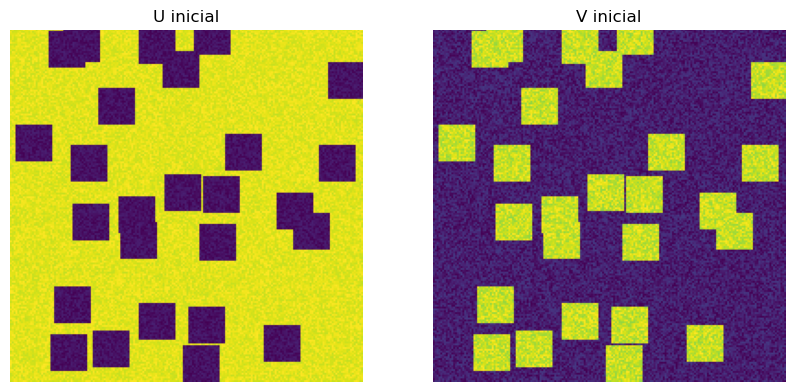

In [13]:
# Inicializar campos U y V
U = np.ones((nx, ny))
V = np.zeros((nx, ny))

# Introducir bloques aleatorios
num_blocks = 30
randx = np.random.randint(1, nx-1, num_blocks)
randy = np.random.randint(1, ny-1, num_blocks)
r = 10
for i, j in zip(randx, randy):
    U[i-r:i+r, j-r:j+r] = 0.50
    V[i-r:i+r, j-r:j+r] = 0.25

# Agregar ruido aleatorio
U += 0.05*np.random.random((nx, ny))
V += 0.05*np.random.random((nx, ny))

# Graficar condición inicial
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(U, cmap=cm.viridis, origin='lower')
ax[0].set_title('U inicial')
ax[0].axis('off')
ax[1].imshow(V, cmap=cm.viridis, origin='lower')
ax[1].set_title('V inicial')
ax[1].axis('off')
plt.show()


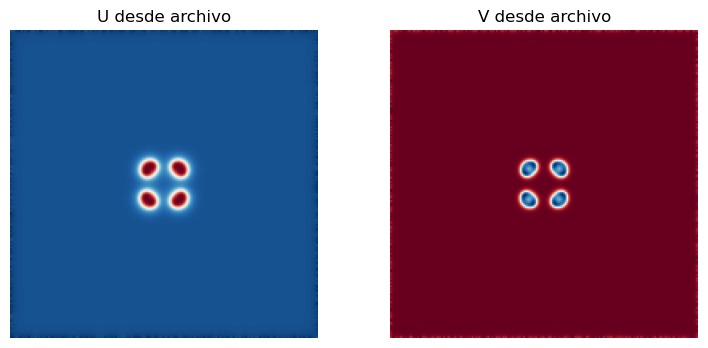

In [14]:
# Leer campos iniciales guardados
filepath = 'uvinitial.npz'
uvinitial = np.load(filepath)
U, V = uvinitial['U'], uvinitial['V']

# Graficar campos leídos
fig, ax = plt.subplots(1, 2, figsize=(9,4))
ax[0].imshow(U, cmap=cm.RdBu)
ax[0].axis('off')
ax[0].set_title('U desde archivo')
ax[1].imshow(V, cmap=cm.RdBu)
ax[1].axis('off')
ax[1].set_title('V desde archivo')
plt.show()


### **<span style="background-color: yellow; color: black">2.4. Explorando patrones</span>**


Una vez que haya completado su simulación, explore algunos interesantes patrones que es posible obtener adoptando el conjunto de parámetros siguientes en el modelo de Gray-Scott:

```python
#Du, Dv, F, k=0.00014, 0.00006, 0.035, 0.065 # Bacteria 2
#Du, Dv, F, k=0.00016, 0.00008, 0.060, 0.062 # Coral
#Du, Dv, F, k=0.00019 # Fingerprint
#Du, Dv, F, k=0.00010 # Spirals
#Du, Dv, F, k=0.00012, # Spirals Dense
#Du, Dv, F, k=0.00010 # Spirals Fast
#Du, Dv, F, k=0.00016 # Unstable
#Du, Dv, F, k=0.00016, 0.00008, 0.050, 0.065 # Worms 1
#Du, Dv, F, k=0.00016 # Worms 2
#Du, Dv, F, k=0.00016 # Zebrafish
```


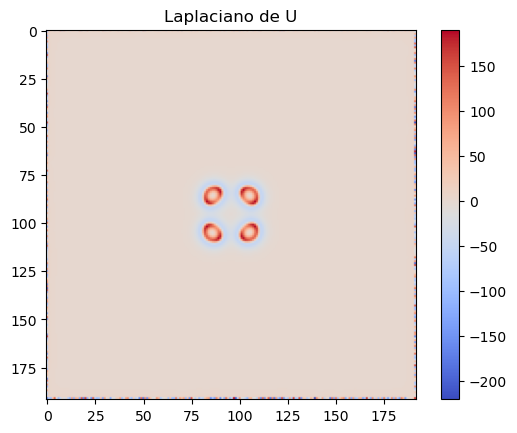

In [15]:
def laplacian(Z):
    Ztop    = np.roll(Z,  1, axis=0)
    Zbottom = np.roll(Z, -1, axis=0)
    Zleft   = np.roll(Z,  1, axis=1)
    Zright  = np.roll(Z, -1, axis=1)
    return (Ztop + Zbottom + Zleft + Zright - 4*Z)/(dx*dx)

# Ejemplo de test del laplaciano
L_test = laplacian(U)
plt.imshow(L_test, cmap=cm.coolwarm)
plt.colorbar()
plt.title("Laplaciano de U")
plt.show()


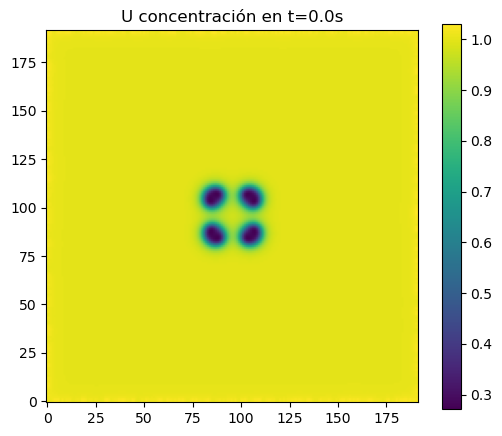

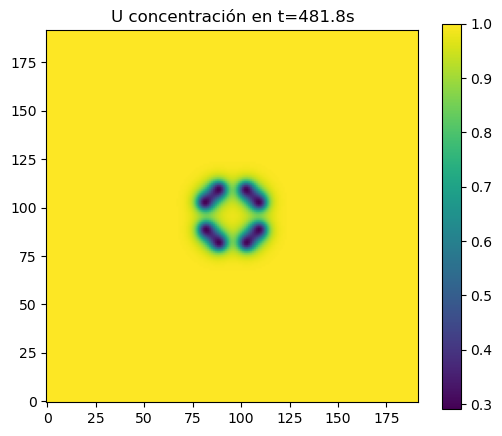

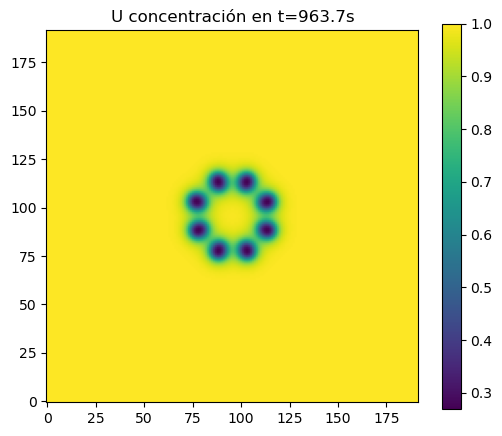

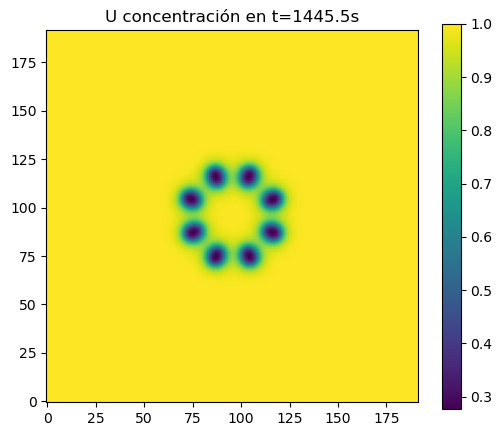

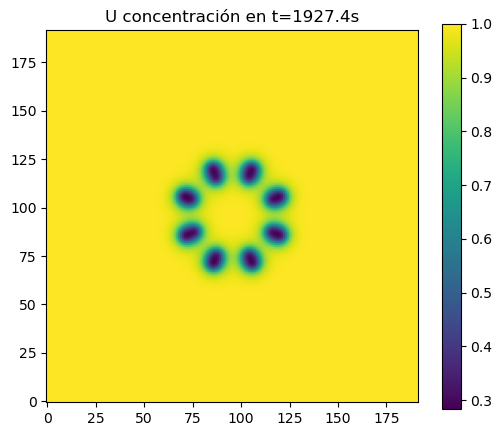

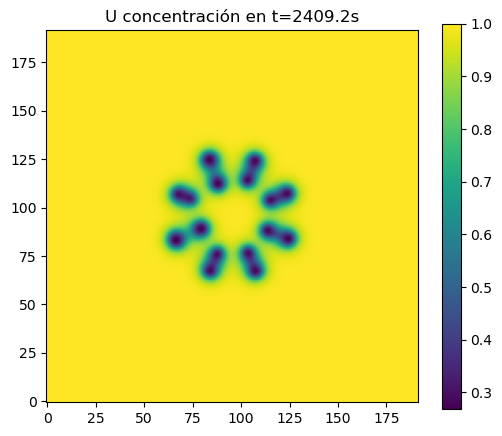

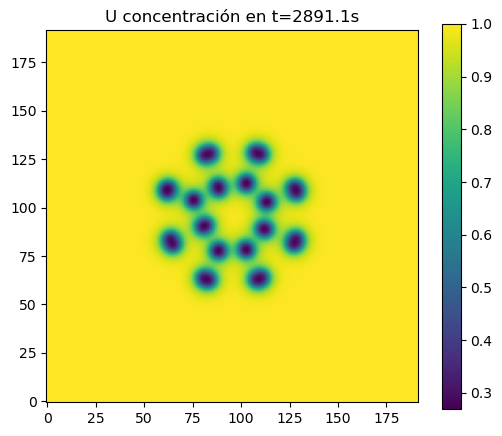

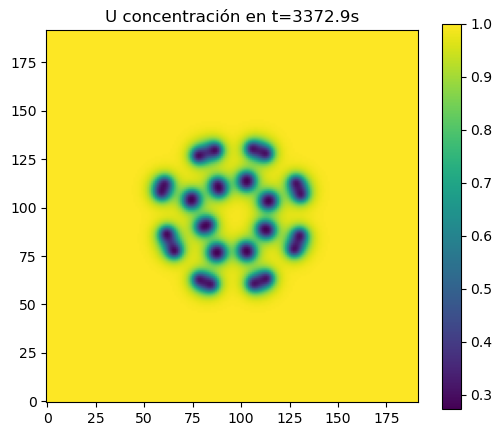

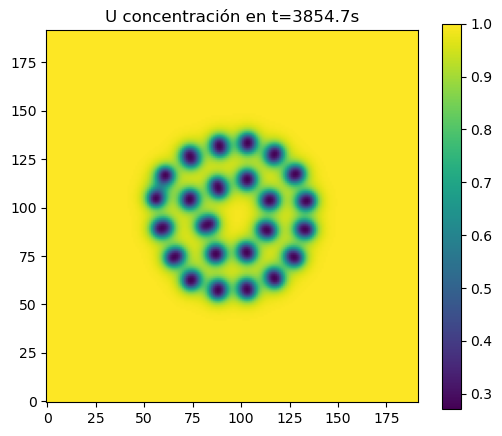

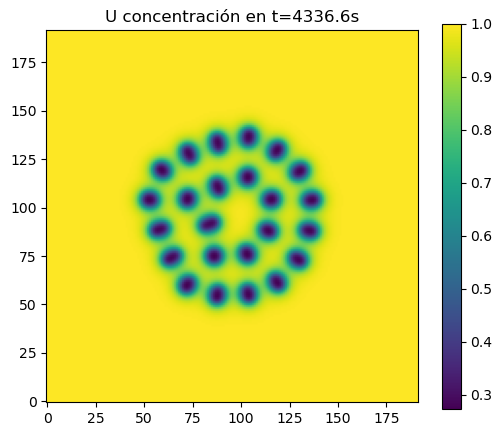

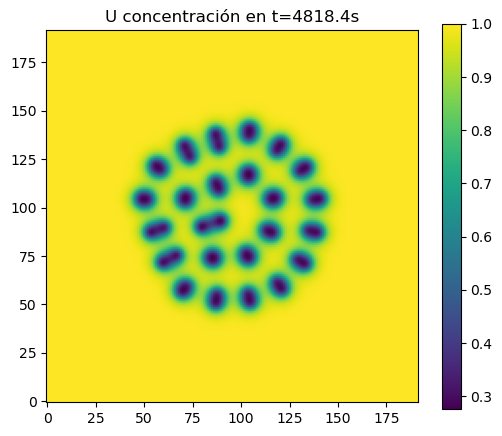

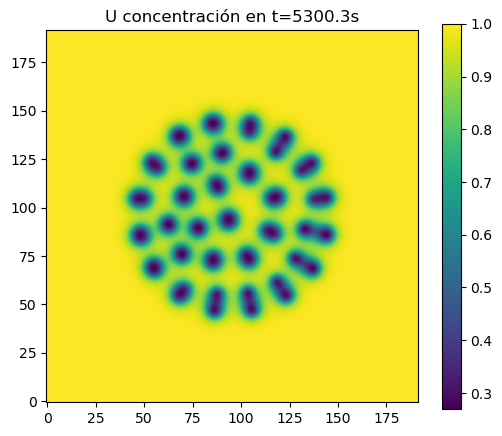

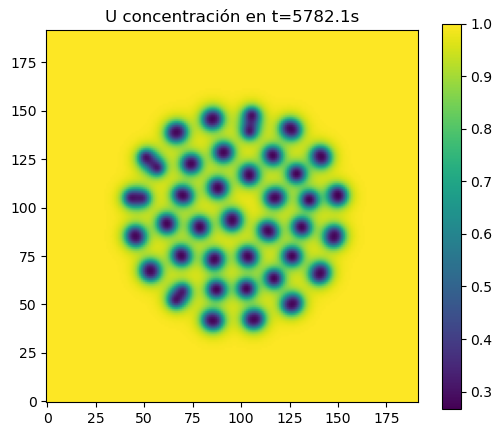

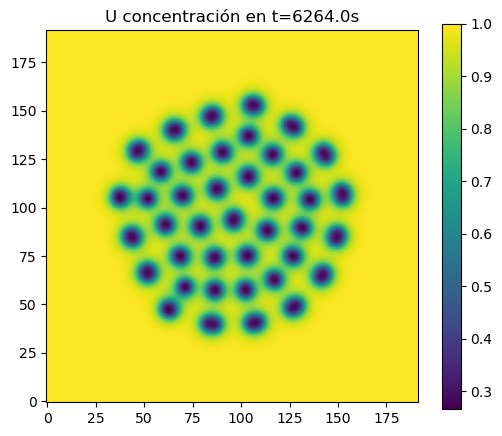

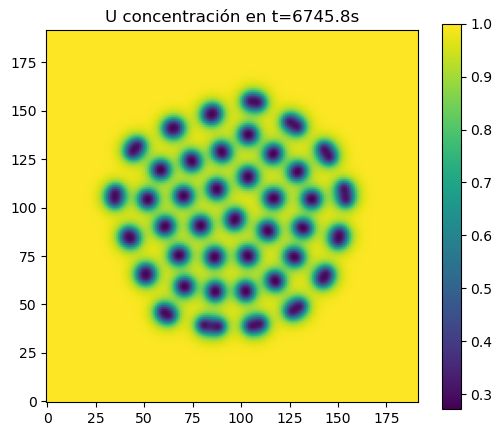

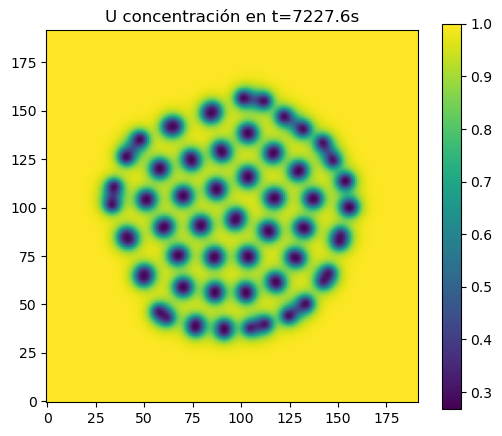

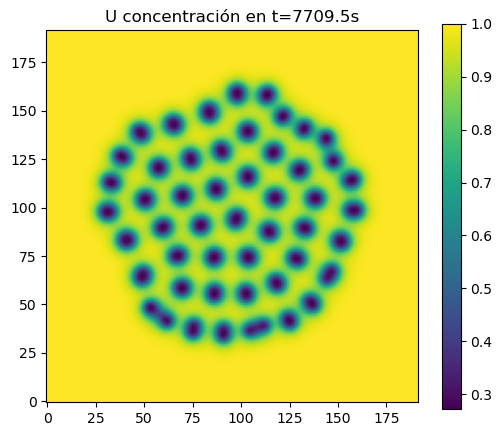

In [16]:
# Simulación temporal
for n_step in range(nt):
    Lu = laplacian(U)
    Lv = laplacian(V)
    
    # Ecuaciones de reacción-difusión (Gray-Scott)
    uvv = U*V*V
    U += dt*(Du*Lu - uvv + F*(1-U))
    V += dt*(Dv*Lv + uvv - (F+k)*V)
    
    # Condiciones de Neumann homogéneas
    U[0,:] = U[1,:]; U[-1,:] = U[-2,:]
    U[:,0] = U[:,1]; U[:,-1] = U[:,-2]
    V[0,:] = V[1,:]; V[-1,:] = V[-2,:]
    V[:,0] = V[:,1]; V[:,-1] = V[:,-2]
    
    # Graficar cada 500 pasos
    if n_step % 500 == 0:
        plt.figure(figsize=(6,5))
        plt.imshow(U, cmap=cm.viridis, origin='lower')
        plt.title(f'U concentración en t={n_step*dt:.1f}s')
        plt.colorbar()
        plt.show()


In [17]:
# Ejemplo de parámetros para distintos patrones
patterns = {
    "Bacteria2": (0.00014, 0.00006, 0.035, 0.065),
    "Coral":     (0.00016, 0.00008, 0.060, 0.062),
    "Worms1":    (0.00016, 0.00008, 0.050, 0.065)
}

# Selección de patrón
Du, Dv, F, k = patterns["Coral"]

print(f"Parámetros seleccionados: Du={Du}, Dv={Dv}, F={F}, k={k}")


Parámetros seleccionados: Du=0.00016, Dv=8e-05, F=0.06, k=0.062
